In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
df = pd.read_csv("C:\\Users\\debas\\OneDrive\\Desktop\\bacnet_historical_values.csv")


In [4]:
bacnet_map = pd.read_csv("C:\\Users\\debas\\OneDrive\\Desktop\\bacnet_values.csv")

In [5]:
df['device_id'] = df['device_id'].astype('string')

In [6]:
df.nunique()

service_id           1594
asset_code             51
site                    6
system_type            11
device_id               7
device_ip               7
object_name          1639
equipment_name         43
equipment_id           43
data_received_on     1753
datapoint             302
monitoring_data     57060
service_status          1
subsystem              13
system_id               1
dtype: int64

In [7]:
import sys
sys.path.append("..")

In [8]:
import sys

from src.bms_ai.utils.main_utils import print_dataframe_info

AT logger_config.py
__name__ from logger_config.py = src.bms_ai.logger_config


In [9]:
print_dataframe_info(df, name="Bacnet Historical Values")


Comprehensive Analysis for: Bacnet Historical Values

1. BASIC INFORMATION
----------------------------------------------------------------------
Shape: 397328 rows × 15 columns
Memory Usage: 376.03 MB
Duplicate Rows: 0

2. DATAFRAME INFO
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397328 entries, 0 to 397327
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   service_id        397328 non-null  object
 1   asset_code        397328 non-null  object
 2   site              397328 non-null  object
 3   system_type       397328 non-null  object
 4   device_id         397328 non-null  string
 5   device_ip         397328 non-null  object
 6   object_name       397328 non-null  object
 7   equipment_name    397328 non-null  object
 8   equipment_id      397328 non-null  object
 9   data_received_on  397328 non-null  object
 10  datapoint

In [10]:
# First, ensure the column is datetime
df['data_received_on'] = pd.to_datetime(df['data_received_on'], errors='coerce')

# Check if the datetime has timezone info
if df['data_received_on'].dt.tz is not None:
    # If it has timezone, remove it
    df['data_received_on_naive'] = df['data_received_on'].dt.tz_localize(None)
else:
    # If it's already naive (no timezone), just copy it
    df['data_received_on_naive'] = df['data_received_on']
    
    
df.set_index('data_received_on_naive', inplace=True)

In [11]:
df.reset_index(inplace=True)

In [12]:
df['data_received_on_naive'].rename('timestamp', inplace=True)

0        2025-11-10 04:23:14.007
1        2025-11-10 04:04:37.931
2        2025-11-10 03:48:21.811
3        2025-11-10 03:29:45.099
4        2025-11-10 03:13:56.666
                   ...          
397323   2025-11-07 12:10:29.305
397324   2025-11-07 11:54:06.002
397325   2025-11-07 11:37:27.586
397326   2025-11-07 11:23:06.602
397327   2025-11-07 11:06:56.469
Name: timestamp, Length: 397328, dtype: datetime64[ns]

In [13]:
df.rename(columns={'data_received_on_naive': 'timestamp'}, inplace=True)
df.set_index('timestamp', inplace=True)

In [14]:
df.sort_index(inplace=True)

In [15]:
df.tail()

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
timestamp,,,,,,,,,,,,,,,
2025-11-10 04:41:30.939,FLR_-HVA-09TDwp,FLR_-HVA-09,Flr_01,HVAC,233,100:43,VOX_FCU'Flr_01'RS_FCU_FYR_MAIN SERVER ROOM_9B'...,RS_FCU_FYR_MAIN SERVER ROOM_9B,RS_FCU_FYR_MAIN SERVER ROOM_9B,2025-11-10 04:41:30.939000+00:00,TDwp,0,TBD,-,-
2025-11-10 04:41:30.939,FLR_-RHV-09DmpOaVntCtr,FLR_-RHV-09,Flr_01,RHvacCoo,233,100:43,VOX_FCU'Flr_01'R_FCU_FYR_SERVER ROOM_9B'RHvacC...,R_FCU_FYR_SERVER ROOM_9B,R_FCU_FYR_SERVER ROOM_9B,2025-11-10 04:41:30.939000+00:00,DmpOaVntCtr,0,TBD,VntCtl,-
2025-11-10 04:41:30.939,FLR_-RHV-09PrSpCCmf,FLR_-RHV-09,Flr_01,RHvacCoo,233,100:43,VOX_FCU'Flr_01'R_FCU_FYR_SERVER ROOM_9B'RHvacC...,R_FCU_FYR_SERVER ROOM_9B,R_FCU_FYR_SERVER ROOM_9B,2025-11-10 04:41:30.939000+00:00,PrSpCCmf,20,TBD,TCtlC,-
2025-11-10 04:41:30.939,FLR_-ROP-09FanSpdRu,FLR_-ROP-09,Flr_01,ROpUnDev(1),233,100:43,VOX_FCU'Flr_01'RS_FCU_FYR_MAIN SERVER ROOM_9B'...,RS_FCU_FYR_MAIN SERVER ROOM_9B,RS_FCU_FYR_MAIN SERVER ROOM_9B,2025-11-10 04:41:30.939000+00:00,FanSpdRu,100,TBD,-,-
2025-11-10 04:41:30.939,FLR_-RGR-09RLgtEei,FLR_-RGR-09,Flr_01,RGrnLf,233,100:43,VOX_FCU'Flr_01'R_FCU_FYR_SERVER ROOM_9B'RGrnLf...,R_FCU_FYR_SERVER ROOM_9B,R_FCU_FYR_SERVER ROOM_9B,2025-11-10 04:41:30.939000+00:00,RLgtEei,1,TBD,-,-


In [16]:
custom_df = df.reset_index()
custom_df['timestamp'].dtype


dtype('<M8[ns]')

In [17]:
timestamp = df.index
timestamps = pd.to_datetime(timestamp.unique())

val = timestamps[1] - timestamps[0]

In [18]:
timestamps.diff()

TimedeltaIndex([                     NaT, '0 days 00:16:03.884000',
                '0 days 00:15:54.642000', '0 days 00:15:41.419000',
                '0 days 00:17:50.469000', '0 days 00:19:15.097000',
                '0 days 00:15:59.536000', '0 days 00:03:47.770000',
                '0 days 00:07:05.658000', '0 days 00:02:24.069000',
                ...
                '0 days 00:00:31.169000', '0 days 00:02:03.175000',
                '0 days 00:02:49.845000', '0 days 00:04:01.896000',
                '0 days 00:02:03.264000', '0 days 00:02:28.457000',
                '0 days 00:01:57.391000', '0 days 00:02:14.917000',
                '0 days 00:03:24.437000', '0 days 00:02:06.570000'],
               dtype='timedelta64[ns]', name='timestamp', length=1753, freq=None)

In [19]:
time_diffs = pd.Series(timestamps.diff())
index_df = pd.DataFrame({
    'timestamp': timestamps,
    'time_diff': time_diffs
})

print(index_df)
print("\n" + "="*50)

print(f"Mean difference: {time_diffs.mean()}")
print(f"Min difference: {time_diffs.min()}")
print(f"Max difference: {time_diffs.max()}")
print(f"Median difference: {time_diffs.median()}")
print(f"Std deviation: {time_diffs.std()}")

time_diffs_seconds = time_diffs.dt.total_seconds()
print("\n" + "="*50)
print("Statistics in seconds:")
print(f"Mean: {time_diffs_seconds.mean():.2f} seconds")
print(f"Min: {time_diffs_seconds.min():.2f} seconds")
print(f"Max: {time_diffs_seconds.max():.2f} seconds")

                   timestamp              time_diff
0    2025-11-07 07:39:03.447                    NaT
1    2025-11-07 07:55:07.331 0 days 00:16:03.884000
2    2025-11-07 08:11:01.973 0 days 00:15:54.642000
3    2025-11-07 08:26:43.392 0 days 00:15:41.419000
4    2025-11-07 08:44:33.861 0 days 00:17:50.469000
...                      ...                    ...
1748 2025-11-10 04:31:47.624 0 days 00:02:28.457000
1749 2025-11-10 04:33:45.015 0 days 00:01:57.391000
1750 2025-11-10 04:35:59.932 0 days 00:02:14.917000
1751 2025-11-10 04:39:24.369 0 days 00:03:24.437000
1752 2025-11-10 04:41:30.939 0 days 00:02:06.570000

[1753 rows x 2 columns]

Mean difference: 0 days 00:02:21.865006849
Min difference: 0 days 00:00:18.448000
Max difference: 0 days 00:19:15.097000
Median difference: 0 days 00:02:13.741000
Std deviation: 0 days 00:01:18.082429865

Statistics in seconds:
Mean: 141.87 seconds
Min: 18.45 seconds
Max: 1155.10 seconds


In [20]:
index_df[index_df['time_diff'] > pd.Timedelta(minutes=10)]

,timestamp,time_diff
1,2025-11-07 07:55:07.331,0 days 00:16:03.884000
2,2025-11-07 08:11:01.973,0 days 00:15:54.642000
3,2025-11-07 08:26:43.392,0 days 00:15:41.419000
4,2025-11-07 08:44:33.861,0 days 00:17:50.469000
5,2025-11-07 09:03:48.958,0 days 00:19:15.097000
6,2025-11-07 09:19:48.494,0 days 00:15:59.536000


In [21]:
def pivot_timeseries_data(df: pd.DataFrame,pivot_columns = ['data_received_on_naive', 'site', 'system_type'],index:str="data_received_on_naive") -> pd.DataFrame:
    """
    Pivots a long-format time-series DataFrame to a wide format.

    This function groups the data by timestamp, site, and system type.
    It then transforms the unique values from the 'datapoint' column into
    new columns, filled with the corresponding 'monitoring_data' values.

    Args:
        df (pd.DataFrame): The input DataFrame in long format.
        index : Set index with specified column 
            default : data_received_on_naive

    Returns:
        pd.DataFrame: The pivoted DataFrame in wide format.
    """
    print("Pivoting the DataFrame...")
    
    pivoted_df = df.pivot_table(
        index= pivot_columns,
        columns='datapoint',
        values='monitoring_data',
        aggfunc='first'  
    )
    pivoted_df = pivoted_df.reset_index()
    pivoted_df.set_index(index,inplace=True)
    pivoted_df.columns.name = None
    
    print("Pivoting complete.")
    return pivoted_df

In [22]:
df.head()

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id
timestamp,,,,,,,,,,,,,,,
2025-11-07 07:39:03.447,OS02-AHU-05TSOcc,OS02-AHU-05,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu5'TSOcc,Ahu5,Ahu5,2025-11-07 07:39:03.447000+00:00,TSOcc,1,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14SpTROcc,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'SpTROcc,Ahu14,Ahu14,2025-11-07 07:39:03.447000+00:00,SpTROcc,22,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-16CmdVFD,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'CmdVFD,Ahu16,Ahu16,2025-11-07 07:39:03.447000+00:00,CmdVFD,active,TBD,-,-
2025-11-07 07:39:03.447,OS02-MAH-01TSu,OS02-MAH-01,OS02,MAHU1,2122754,1:0x0102,VOX'OS02'Mahu1'AhuMkp1'TSu,AhuMkp1,AhuMkp1,2025-11-07 07:39:03.447000+00:00,TSu,21.78499984741211,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14StaVFDSf,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'StaVFDSf,Ahu14,Ahu14,2025-11-07 07:39:03.447000+00:00,StaVFDSf,active,TBD,-,-


In [23]:
pivoted_df = pivot_timeseries_data(df,pivot_columns = ['timestamp'],index="timestamp")
pivoted_df

Pivoting the DataFrame...
Pivoting complete.


,AFFAlm,AQualRIndRu,AQualRRu,AlmAutoEf,AlmAutoSf,AlmBag,AlmFAD,AlmFAD1,AlmFire,AlmFlw,...,VavAirFlEnd,VoltAB,VoltAN,VoltBC,VoltBN,VoltCA,VoltCN,WarmUpReq,WndContRu,kit3
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-11-07 07:39:03.447,NaN,NaN,NaN,NaN,NaN,NaN,inactive,NaN,inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-07 07:55:07.331,NaN,NaN,NaN,NaN,NaN,NaN,inactive,NaN,inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-07 08:11:01.973,NaN,NaN,NaN,NaN,NaN,NaN,inactive,NaN,inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-07 08:26:43.392,NaN,NaN,NaN,NaN,NaN,NaN,inactive,NaN,inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-07 08:44:33.861,NaN,NaN,NaN,NaN,NaN,NaN,inactive,NaN,inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10 04:31:47.624,NaN,NaN,NaN,NaN,NaN,NaN,inactive,NaN,NaN,inactive,...,NaN,412.3925476074219,238.01632690429688,413.6820068359375,238.29080200195312,413.14544677734375,239.77581787109375,NaN,NaN,NaN
2025-11-10 04:33:45.015,inactive,NaN,NaN,inactive,inactive,NaN,inactive,inactive,NaN,inactive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-10 04:35:59.932,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100,NaN,NaN,NaN,NaN,NaN,NaN,inactive,inactive,NaN


In [24]:
reset_df = df.reset_index()



In [25]:
df.drop(columns=['data_received_on'], inplace=True)

In [26]:
df
# ahu_df = df[df['system_type'] == 'AHU']
# ahu_df

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,datapoint,monitoring_data,service_status,subsystem,system_id
timestamp,,,,,,,,,,,,,,
2025-11-07 07:39:03.447,OS02-AHU-05TSOcc,OS02-AHU-05,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu5'TSOcc,Ahu5,Ahu5,TSOcc,1,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14SpTROcc,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'SpTROcc,Ahu14,Ahu14,SpTROcc,22,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-16CmdVFD,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'CmdVFD,Ahu16,Ahu16,CmdVFD,active,TBD,-,-
2025-11-07 07:39:03.447,OS02-MAH-01TSu,OS02-MAH-01,OS02,MAHU1,2122754,1:0x0102,VOX'OS02'Mahu1'AhuMkp1'TSu,AhuMkp1,AhuMkp1,TSu,21.78499984741211,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14StaVFDSf,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'StaVFDSf,Ahu14,Ahu14,StaVFDSf,active,TBD,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10 04:41:30.939,FLR_-HVA-09TDwp,FLR_-HVA-09,Flr_01,HVAC,233,100:43,VOX_FCU'Flr_01'RS_FCU_FYR_MAIN SERVER ROOM_9B'...,RS_FCU_FYR_MAIN SERVER ROOM_9B,RS_FCU_FYR_MAIN SERVER ROOM_9B,TDwp,0,TBD,-,-
2025-11-10 04:41:30.939,FLR_-RHV-09DmpOaVntCtr,FLR_-RHV-09,Flr_01,RHvacCoo,233,100:43,VOX_FCU'Flr_01'R_FCU_FYR_SERVER ROOM_9B'RHvacC...,R_FCU_FYR_SERVER ROOM_9B,R_FCU_FYR_SERVER ROOM_9B,DmpOaVntCtr,0,TBD,VntCtl,-
2025-11-10 04:41:30.939,FLR_-RHV-09PrSpCCmf,FLR_-RHV-09,Flr_01,RHvacCoo,233,100:43,VOX_FCU'Flr_01'R_FCU_FYR_SERVER ROOM_9B'RHvacC...,R_FCU_FYR_SERVER ROOM_9B,R_FCU_FYR_SERVER ROOM_9B,PrSpCCmf,20,TBD,TCtlC,-


In [27]:
df["system_type"].unique()

array(['AHU', 'MAHU1', 'SMDB', 'SPLITUNIT', 'ExFans', 'HVAC',
       'ROpUnDev(1)', 'RHvacCoo', 'ROpModDtr', 'RGrnLf', 'MtrEMU'],
      dtype=object)

In [28]:
arr = index_df['timestamp'].to_list()
mismatched_arr = []
time_to_records = {}
for time in arr:
    print(f"time: {time} and number of records: {len(df.loc[df.index == time])}")
    time_to_records[time] = len(df.loc[df.index == time])
    if len(df.loc[df.index == time]) != 30:
        mismatched_arr.append(time)

time: 2025-11-07 07:39:03.447000 and number of records: 30
time: 2025-11-07 07:55:07.331000 and number of records: 30
time: 2025-11-07 08:11:01.973000 and number of records: 30
time: 2025-11-07 08:26:43.392000 and number of records: 30
time: 2025-11-07 08:44:33.861000 and number of records: 30
time: 2025-11-07 09:03:48.958000 and number of records: 30
time: 2025-11-07 09:19:48.494000 and number of records: 71
time: 2025-11-07 09:23:36.264000 and number of records: 49
time: 2025-11-07 09:30:41.922000 and number of records: 72
time: 2025-11-07 09:33:05.991000 and number of records: 89
time: 2025-11-07 09:36:06.337000 and number of records: 123
time: 2025-11-07 09:39:53.639000 and number of records: 148
time: 2025-11-07 09:46:55.896000 and number of records: 122
time: 2025-11-07 09:49:28.500000 and number of records: 173
time: 2025-11-07 09:52:26.640000 and number of records: 232
time: 2025-11-07 10:00:49.236000 and number of records: 278
time: 2025-11-07 10:03:38.413000 and number of rec

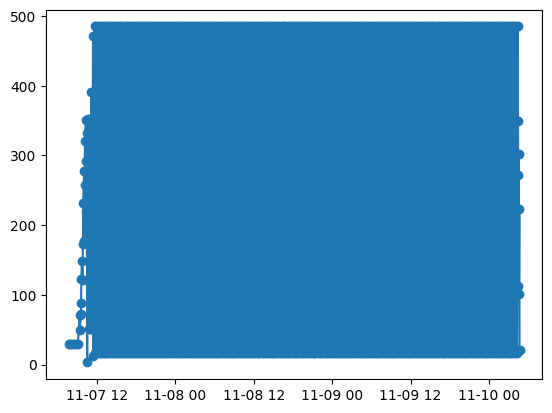

In [29]:
import matplotlib.pyplot as plt

plt.plot(list(time_to_records.keys()), list(time_to_records.values()), marker='o', linestyle='-')


In [30]:
len(time_to_records.keys())

1753

In [31]:
time_to_records

{Timestamp('2025-11-07 07:39:03.447000'): 30,
 Timestamp('2025-11-07 07:55:07.331000'): 30,
 Timestamp('2025-11-07 08:11:01.973000'): 30,
 Timestamp('2025-11-07 08:26:43.392000'): 30,
 Timestamp('2025-11-07 08:44:33.861000'): 30,
 Timestamp('2025-11-07 09:03:48.958000'): 30,
 Timestamp('2025-11-07 09:19:48.494000'): 71,
 Timestamp('2025-11-07 09:23:36.264000'): 49,
 Timestamp('2025-11-07 09:30:41.922000'): 72,
 Timestamp('2025-11-07 09:33:05.991000'): 89,
 Timestamp('2025-11-07 09:36:06.337000'): 123,
 Timestamp('2025-11-07 09:39:53.639000'): 148,
 Timestamp('2025-11-07 09:46:55.896000'): 122,
 Timestamp('2025-11-07 09:49:28.500000'): 173,
 Timestamp('2025-11-07 09:52:26.640000'): 232,
 Timestamp('2025-11-07 10:00:49.236000'): 278,
 Timestamp('2025-11-07 10:03:38.413000'): 177,
 Timestamp('2025-11-07 10:05:40.631000'): 258,
 Timestamp('2025-11-07 10:08:34.431000'): 321,
 Timestamp('2025-11-07 10:17:20.315000'): 351,
 Timestamp('2025-11-07 10:19:44.864000'): 220,
 Timestamp('2025-11-07 

In [32]:
ahu_df = df[df["system_type"] == "AHU"]
df.shape[0]-ahu_df.shape[0]

122681

In [33]:
ahu_df['datapoint'].unique()

array(['TSOcc', 'SpTROcc', 'CmdVFD', 'StaVFDSf', 'StaFlw', 'HuRt',
       'SpMaxVFD', 'AlmPreFlt', 'AlmNtAuto', 'TBStaFlw', 'CmdCHW',
       'AlmFAD', 'AlmFire', 'TBCMDCHW', 'TBTSu', 'ChwTemp', 'TempSu',
       'SpFAD1', 'SpTRHiLo', 'AlmTrpSf', 'Co2RA2', 'TempSp1', 'StaAuto',
       'SpCo2Hi', 'CMDSpdVFD', 'TRe', 'AlmRACoHi', 'SpTREff', 'SpHuR',
       'SpHuSpcCt', 'FbFAD', 'FbVFD', 'TBHuSu', 'RtCo2', 'HuAvg1',
       'TBFbFAD', 'PIDTR', 'Co2RA', 'HuR1', 'SpTRUnoc', 'AlmTRLow',
       'TBTRt', 'HuR2', 'TBTe', 'Co2RA1', 'SpFAD', 'FbVFDSf2', 'HuSu',
       'StaVFDSf2', 'Almbag', 'TsOn', 'HuOff', 'TBHuRt', 'FlSu', 'CmdFAD',
       'AlmTrpVFD', 'AlmFlwEf', 'AlmFlwSf', 'TBFbCHW', 'OnTemp1', 'FbCHW',
       'AlmTrpSf1', 'SpCo2Band', 'PIDVFD', 'AlmFlw', 'ChwFb', 'TBCMDVFD',
       'TBCo2', 'AlmTRHi', 'OffTemp2', 'AlmTrpEf', 'OnHum3', 'SpMinVFD',
       'OffHum3', 'HumSu', 'TRt', 'StaAutoEf', 'DmpSts', 'StaFlwSf',
       'OffHum2', 'StaFlwEf', 'StsDamp', 'CmdVFDSf', 'OnTemp3', 'TrAvg',
       

In [34]:
ahu_df

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,datapoint,monitoring_data,service_status,subsystem,system_id
timestamp,,,,,,,,,,,,,,
2025-11-07 07:39:03.447,OS02-AHU-05TSOcc,OS02-AHU-05,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu5'TSOcc,Ahu5,Ahu5,TSOcc,1,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14SpTROcc,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'SpTROcc,Ahu14,Ahu14,SpTROcc,22,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-16CmdVFD,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'CmdVFD,Ahu16,Ahu16,CmdVFD,active,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14StaVFDSf,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'StaVFDSf,Ahu14,Ahu14,StaVFDSf,active,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-15StaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'StaFlw,Ahu15,Ahu15,StaFlw,active,TBD,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10 04:39:24.369,OS02-AHU-15TBStaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'TBStaFlw,Ahu15,Ahu15,TBStaFlw,NaN,TBD,-,-
2025-11-10 04:39:24.369,OS02-AHU-15CMDSpdVFD,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'CMDSpdVFD,Ahu15,Ahu15,CMDSpdVFD,0,TBD,-,-
2025-11-10 04:39:24.369,OS02-AHU-16TBCMDCHW,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'TBCMDCHW,Ahu16,Ahu16,TBCMDCHW,NaN,TBD,-,-


In [35]:
# import pandas as pd
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import numpy as np

# # Your data dictionary
# data = time

# # Convert to DataFrame
# df = pd.DataFrame(list(data.items()), columns=['timestamp', 'value'])
# df = df.sort_values('timestamp').reset_index(drop=True)

# # Calculate time differences
# df['time_diff_seconds'] = df['timestamp'].diff().dt.total_seconds()

# # Create subplots
# fig = make_subplots(
#     rows=4, cols=2,
#     subplot_titles=(
#         'Time Series - Raw Values',
#         'Value Distribution',
#         'Time Differences Between Events',
#         'Values by Hour of Day',
#         'Cumulative Sum Over Time',
#         'Rolling Average (window=10)',
#         'Value Frequency Heatmap',
#         'Scatter: Time Diff vs Value'
#     ),
#     specs=[
#         [{"secondary_y": False}, {"secondary_y": False}],
#         [{"secondary_y": False}, {"secondary_y": False}],
#         [{"secondary_y": False}, {"secondary_y": False}],
#         [{"secondary_y": False}, {"secondary_y": False}]
#     ],
#     vertical_spacing=0.12,
#     horizontal_spacing=0.15
# )

# # 1. Time Series Plot
# fig.add_trace(
#     go.Scatter(x=df['timestamp'], y=df['value'], 
#                mode='lines+markers', name='Value',
#                marker=dict(size=3)),
#     row=1, col=1
# )

# # 2. Value Distribution (Histogram)
# fig.add_trace(
#     go.Histogram(x=df['value'], nbinsx=30, name='Distribution'),
#     row=1, col=2
# )

# # 3. Time Differences
# fig.add_trace(
#     go.Scatter(x=df.index[1:], y=df['time_diff_seconds'][1:],
#                mode='lines+markers', name='Time Diff',
#                marker=dict(size=3)),
#     row=2, col=1
# )

# # 4. Values by Hour
# df['hour'] = df['timestamp'].dt.hour
# hourly_avg = df.groupby('hour')['value'].mean()
# fig.add_trace(
#     go.Bar(x=hourly_avg.index, y=hourly_avg.values, name='Avg by Hour'),
#     row=2, col=2
# )

# # 5. Cumulative Sum
# fig.add_trace(
#     go.Scatter(x=df['timestamp'], y=df['value'].cumsum(),
#                mode='lines', name='Cumulative Sum'),
#     row=3, col=1
# )

# # 6. Rolling Average
# df['rolling_avg'] = df['value'].rolling(window=10, center=True).mean()
# fig.add_trace(
#     go.Scatter(x=df['timestamp'], y=df['rolling_avg'],
#                mode='lines', name='Rolling Avg',
#                line=dict(width=2, color='red')),
#     row=3, col=2
# )
# fig.add_trace(
#     go.Scatter(x=df['timestamp'], y=df['value'],
#                mode='markers', name='Original',
#                marker=dict(size=2, opacity=0.5)),
#     row=3, col=2
# )

# # 7. Value Frequency Heatmap (as bar chart)
# value_counts = df['value'].value_counts().sort_index()
# fig.add_trace(
#     go.Bar(x=value_counts.index, y=value_counts.values, 
#            name='Value Frequency'),
#     row=4, col=1
# )

# # 8. Scatter: Time Diff vs Value
# fig.add_trace(
#     go.Scatter(x=df['time_diff_seconds'][1:], y=df['value'][1:],
#                mode='markers', name='Time Diff vs Value',
#                marker=dict(size=5, opacity=0.6)),
#     row=4, col=2
# )

# # Update layout
# fig.update_layout(
#     height=1400,
#     title_text=f"Time Series Analysis - {len(df)} Data Points",
#     showlegend=False,
#     template='plotly_white'
# )

# # Update axes labels
# fig.update_xaxes(title_text="Time", row=1, col=1)
# fig.update_xaxes(title_text="Value", row=1, col=2)
# fig.update_xaxes(title_text="Index", row=2, col=1)
# fig.update_xaxes(title_text="Hour of Day", row=2, col=2)
# fig.update_xaxes(title_text="Time", row=3, col=1)
# fig.update_xaxes(title_text="Time", row=3, col=2)
# fig.update_xaxes(title_text="Value", row=4, col=1)
# fig.update_xaxes(title_text="Time Diff (seconds)", row=4, col=2)

# fig.update_yaxes(title_text="Value", row=1, col=1)
# fig.update_yaxes(title_text="Count", row=1, col=2)
# fig.update_yaxes(title_text="Seconds", row=2, col=1)
# fig.update_yaxes(title_text="Avg Value", row=2, col=2)
# fig.update_yaxes(title_text="Cumulative", row=3, col=1)
# fig.update_yaxes(title_text="Value", row=3, col=2)
# fig.update_yaxes(title_text="Frequency", row=4, col=1)
# fig.update_yaxes(title_text="Value", row=4, col=2)

# fig.show()

# # Print statistics
# print("="*70)
# print("STATISTICAL SUMMARY")
# print("="*70)
# print(f"\nTotal Data Points: {len(df)}")
# print(f"Time Range: {df['timestamp'].min()} to {df['timestamp'].max()}")
# print(f"Duration: {(df['timestamp'].max() - df['timestamp'].min())}")

# print("\n--- Value Statistics ---")
# print(df['value'].describe())
# print(f"\nUnique Values: {df['value'].nunique()}")
# print(f"Most Common Value: {df['value'].mode().values[0]} (appears {(df['value'] == df['value'].mode().values[0]).sum()} times)")

# print("\n--- Time Difference Statistics (seconds) ---")
# print(df['time_diff_seconds'].describe())

# print("\n--- Value Frequency ---")
# print(df['value'].value_counts().sort_index())

In [36]:
ahu_object_name_arr = ahu_df["object_name"].values.tolist()

In [37]:
bacnet_map.shape

(2127, 9)

In [38]:
bacnet_map = bacnet_map[bacnet_map['object_name'].isin(ahu_object_name_arr)]
bacnet_map

,object_name,data_received_on,description,device_id,ismanual,object_id,object_type,present_value,units
1,VOX'OS04'Ahu'Ahu7'SpHuSpcCt,2025-11-07T11:13:54.453 UTC,Space Air Humidity Cut Off Setpoint,2122756,False,33,analogValue,5,percentRelativeHumidity
2,VOX'OS01'Ahu'Ahu2'HuR,2025-11-07T11:06:56.469 UTC,Return Air Humidity,2122753,False,81,analogInput,54.119998931884766,percentRelativeHumidity
4,VOX'OS01'Ahu'FAHU2'CmdOnEf,2025-11-07T11:06:56.469 UTC,FAHU Exhaust Fan Start/Stop Command,2122753,False,8,binaryOutput,active,NaN
6,VOX'OS05'Ahu'Ahu10'TBHuRt,2025-11-07T11:09:52.707 UTC,Trend Return Air Humidity,2122757,False,5,trendLog,NaN,NaN
7,VOX'OS04'Ahu'FAHU'TBStaFlw,2025-11-07T11:13:54.453 UTC,Trend Supply Fan Airflow Status,2122756,False,51,trendLog,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2121,VOX'OS04'Ahu'Ahu6'AlmTRHi,2025-11-07T11:13:54.453 UTC,Room High Temperature Alarm,2122756,False,11,binaryValue,inactive,NaN
2122,VOX'OS01'Ahu'Ahu2'TBCo2,2025-11-07T11:06:56.469 UTC,Trend Space Air Co2,2122753,False,25,trendLog,NaN,NaN
2123,VOX'OS01'Ahu'Ahu3'TBTRt,2025-11-07T11:06:56.469 UTC,Trend Return Air Temperature,2122753,False,42,trendLog,NaN,NaN
2125,VOX'OS05'Ahu'Ahu10'SpTREff,2025-11-07T11:09:52.707 UTC,Room Temperature Effective Setpoint,2122757,False,16,analogValue,21,degreesCelsius


In [39]:
print_dataframe_info(bacnet_map)


Comprehensive Analysis for: DataFrame

1. BASIC INFORMATION
----------------------------------------------------------------------
Shape: 1149 rows × 9 columns
Memory Usage: 0.49 MB
Duplicate Rows: 0

2. DATAFRAME INFO
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 1 to 2126
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   object_name       1149 non-null   object
 1   data_received_on  1149 non-null   object
 2   description       1149 non-null   object
 3   device_id         1149 non-null   int64 
 4   ismanual          1149 non-null   bool  
 5   object_id         1149 non-null   int64 
 6   object_type       1149 non-null   object
 7   present_value     908 non-null    object
 8   units             566 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 81.9+ KB

3. COLUMN TYPES BREAKDOWN
---------------

In [40]:
for i in bacnet_map.columns:
    print(f"{bacnet_map[i].value_counts()}")

object_name
VOX'OS04'Ahu'FAHU'StaVFDEf      1
VOX'OS04'Ahu'Ahu7'SpHuSpcCt     1
VOX'OS01'Ahu'Ahu2'HuR           1
VOX'OS01'Ahu'FAHU2'CmdOnEf      1
VOX'OS05'Ahu'Ahu10'TBHuRt       1
                               ..
VOX'OS02'Ahu'Ahu16'SpCo2Band    1
VOX'OS01'Ahu'Ahu3'AlmTrpSf      1
VOX'OS01'Ahu'AhuMkp2'SpFAD      1
VOX'OS01'Ahu'FAHU2'TBTSu        1
VOX'OS01'Ahu'Ahu2'CmdVFD        1
Name: count, Length: 1149, dtype: int64
data_received_on
2025-11-07T11:06:56.469 UTC    349
2025-11-07T11:13:54.453 UTC    293
2025-11-07T11:19:20.965 UTC    287
2025-11-07T11:09:52.707 UTC    220
Name: count, dtype: int64
description
Trend Supply Fan Airflow Status    20
PID - Control For VFD              20
FAD Fail to Open Alarm             20
Supply Fan Air Flow Fail Alarm     20
Trend CHW Valve Feedback           20
                                   ..
Space Air Humidity-1                1
Supply Air Temperature Setpoint     1
FAHU Supply Fan Auto Status-1       1
FAHU Pre Filter Status-1            1

In [41]:
# ahu_df.reset_index(inplace=True)
# ahu_df = ahu_df.merge(bacnet_map, on=['object_name'], how='left')
# ahu_df.set_index('timestamp', inplace=True)
# ahu_df

In [42]:
result = df[df["system_type"] == "AHU"].groupby('object_name')['device_id'].nunique().reset_index()

# Rename the column for clarity
result.columns = ['object_name', 'device_id_count']

result

,object_name,device_id_count
0,VOX'OS01'Ahu'Ahu1'AlmFAD,1
1,VOX'OS01'Ahu'Ahu1'AlmFlw,1
2,VOX'OS01'Ahu'Ahu1'AlmNtAuto,1
3,VOX'OS01'Ahu'Ahu1'AlmPreFlt,1
4,VOX'OS01'Ahu'Ahu1'AlmRACoHi,1
...,...,...
1144,VOX'OS05'Ahu'Ahu9'TRe,1
1145,VOX'OS05'Ahu'Ahu9'TSOcc,1
1146,VOX'OS05'Ahu'Ahu9'TempSp1,1
1147,VOX'OS05'Ahu'Ahu9'TempSu,1


In [43]:
df1 = bacnet_map[["object_name","device_id"]].sort_values("object_name").reset_index(drop=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  1149 non-null   object
 1   device_id    1149 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.1+ KB


In [44]:
df2 = ahu_df.groupby('object_name')['device_id'].first().reset_index().sort_values("object_name")
df2['device_id'] = pd.to_numeric(df2['device_id'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  1149 non-null   object
 1   device_id    1149 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 19.2+ KB


In [45]:
for i in range(len(df1)):
    if df1.loc[i, "device_id"] != df2.loc[i, "device_id"]:
        print(f"Mismatch at index {i}: df1 device_id = {df1.loc[i, 'device_id']}, df2 device_id = {df2.loc[i, 'device_id']}")

In [46]:
df1.loc[0:10]

,object_name,device_id
0,VOX'OS01'Ahu'Ahu1'AlmFAD,2122753
1,VOX'OS01'Ahu'Ahu1'AlmFlw,2122753
2,VOX'OS01'Ahu'Ahu1'AlmNtAuto,2122753
3,VOX'OS01'Ahu'Ahu1'AlmPreFlt,2122753
4,VOX'OS01'Ahu'Ahu1'AlmRACoHi,2122753
5,VOX'OS01'Ahu'Ahu1'AlmTRHi,2122753
6,VOX'OS01'Ahu'Ahu1'AlmTRLow,2122753
7,VOX'OS01'Ahu'Ahu1'AlmTrpSf,2122753
8,VOX'OS01'Ahu'Ahu1'Almbag,2122753
9,VOX'OS01'Ahu'Ahu1'CMDSpdVFD,2122753


In [47]:
df2.loc[0:10]

,object_name,device_id
0,VOX'OS01'Ahu'Ahu1'AlmFAD,2122753
1,VOX'OS01'Ahu'Ahu1'AlmFlw,2122753
2,VOX'OS01'Ahu'Ahu1'AlmNtAuto,2122753
3,VOX'OS01'Ahu'Ahu1'AlmPreFlt,2122753
4,VOX'OS01'Ahu'Ahu1'AlmRACoHi,2122753
5,VOX'OS01'Ahu'Ahu1'AlmTRHi,2122753
6,VOX'OS01'Ahu'Ahu1'AlmTRLow,2122753
7,VOX'OS01'Ahu'Ahu1'AlmTrpSf,2122753
8,VOX'OS01'Ahu'Ahu1'Almbag,2122753
9,VOX'OS01'Ahu'Ahu1'CMDSpdVFD,2122753


In [48]:
result = df.groupby('device_id')['object_name'].nunique().reset_index()

# Rename the column for clarity
result.columns = ['device_id', 'object_name_count']

result

,device_id,object_name_count
0,2,101
1,2122753,485
2,2122754,350
3,2122755,16
4,2122756,302
5,2122757,272
6,233,113


In [49]:
bacnet_map

,object_name,data_received_on,description,device_id,ismanual,object_id,object_type,present_value,units
1,VOX'OS04'Ahu'Ahu7'SpHuSpcCt,2025-11-07T11:13:54.453 UTC,Space Air Humidity Cut Off Setpoint,2122756,False,33,analogValue,5,percentRelativeHumidity
2,VOX'OS01'Ahu'Ahu2'HuR,2025-11-07T11:06:56.469 UTC,Return Air Humidity,2122753,False,81,analogInput,54.119998931884766,percentRelativeHumidity
4,VOX'OS01'Ahu'FAHU2'CmdOnEf,2025-11-07T11:06:56.469 UTC,FAHU Exhaust Fan Start/Stop Command,2122753,False,8,binaryOutput,active,NaN
6,VOX'OS05'Ahu'Ahu10'TBHuRt,2025-11-07T11:09:52.707 UTC,Trend Return Air Humidity,2122757,False,5,trendLog,NaN,NaN
7,VOX'OS04'Ahu'FAHU'TBStaFlw,2025-11-07T11:13:54.453 UTC,Trend Supply Fan Airflow Status,2122756,False,51,trendLog,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2121,VOX'OS04'Ahu'Ahu6'AlmTRHi,2025-11-07T11:13:54.453 UTC,Room High Temperature Alarm,2122756,False,11,binaryValue,inactive,NaN
2122,VOX'OS01'Ahu'Ahu2'TBCo2,2025-11-07T11:06:56.469 UTC,Trend Space Air Co2,2122753,False,25,trendLog,NaN,NaN
2123,VOX'OS01'Ahu'Ahu3'TBTRt,2025-11-07T11:06:56.469 UTC,Trend Return Air Temperature,2122753,False,42,trendLog,NaN,NaN
2125,VOX'OS05'Ahu'Ahu10'SpTREff,2025-11-07T11:09:52.707 UTC,Room Temperature Effective Setpoint,2122757,False,16,analogValue,21,degreesCelsius


In [50]:
ahu_df.to_csv("C:\\Users\\debas\\OneDrive\\Desktop\\ahu_bacnet_merged.csv")

In [51]:
ahu_df.columns

Index(['service_id', 'asset_code', 'site', 'system_type', 'device_id',
       'device_ip', 'object_name', 'equipment_name', 'equipment_id',
       'datapoint', 'monitoring_data', 'service_status', 'subsystem',
       'system_id'],
      dtype='object')

In [52]:
bacnet_map.columns

Index(['object_name', 'data_received_on', 'description', 'device_id',
       'ismanual', 'object_id', 'object_type', 'present_value', 'units'],
      dtype='object')

In [53]:
common_id_set = set(ahu_df.columns) & set(bacnet_map.columns)
print("Common IDs:", common_id_set)


Common IDs: {'object_name', 'device_id'}


# Merge dfs

In [54]:
ahu_df_temp = ahu_df.copy()
ahu_df_temp.reset_index(inplace=True)

In [55]:
map_temp = bacnet_map.copy()
map_temp

,object_name,data_received_on,description,device_id,ismanual,object_id,object_type,present_value,units
1,VOX'OS04'Ahu'Ahu7'SpHuSpcCt,2025-11-07T11:13:54.453 UTC,Space Air Humidity Cut Off Setpoint,2122756,False,33,analogValue,5,percentRelativeHumidity
2,VOX'OS01'Ahu'Ahu2'HuR,2025-11-07T11:06:56.469 UTC,Return Air Humidity,2122753,False,81,analogInput,54.119998931884766,percentRelativeHumidity
4,VOX'OS01'Ahu'FAHU2'CmdOnEf,2025-11-07T11:06:56.469 UTC,FAHU Exhaust Fan Start/Stop Command,2122753,False,8,binaryOutput,active,NaN
6,VOX'OS05'Ahu'Ahu10'TBHuRt,2025-11-07T11:09:52.707 UTC,Trend Return Air Humidity,2122757,False,5,trendLog,NaN,NaN
7,VOX'OS04'Ahu'FAHU'TBStaFlw,2025-11-07T11:13:54.453 UTC,Trend Supply Fan Airflow Status,2122756,False,51,trendLog,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2121,VOX'OS04'Ahu'Ahu6'AlmTRHi,2025-11-07T11:13:54.453 UTC,Room High Temperature Alarm,2122756,False,11,binaryValue,inactive,NaN
2122,VOX'OS01'Ahu'Ahu2'TBCo2,2025-11-07T11:06:56.469 UTC,Trend Space Air Co2,2122753,False,25,trendLog,NaN,NaN
2123,VOX'OS01'Ahu'Ahu3'TBTRt,2025-11-07T11:06:56.469 UTC,Trend Return Air Temperature,2122753,False,42,trendLog,NaN,NaN
2125,VOX'OS05'Ahu'Ahu10'SpTREff,2025-11-07T11:09:52.707 UTC,Room Temperature Effective Setpoint,2122757,False,16,analogValue,21,degreesCelsius


In [56]:
ahu_df_temp["service_status"].unique()

array(['TBD'], dtype=object)

In [57]:
ahu_df_temp

,timestamp,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,datapoint,monitoring_data,service_status,subsystem,system_id
0,2025-11-07 07:39:03.447,OS02-AHU-05TSOcc,OS02-AHU-05,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu5'TSOcc,Ahu5,Ahu5,TSOcc,1,TBD,-,-
1,2025-11-07 07:39:03.447,OS02-AHU-14SpTROcc,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'SpTROcc,Ahu14,Ahu14,SpTROcc,22,TBD,-,-
2,2025-11-07 07:39:03.447,OS02-AHU-16CmdVFD,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'CmdVFD,Ahu16,Ahu16,CmdVFD,active,TBD,-,-
3,2025-11-07 07:39:03.447,OS02-AHU-14StaVFDSf,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'StaVFDSf,Ahu14,Ahu14,StaVFDSf,active,TBD,-,-
4,2025-11-07 07:39:03.447,OS02-AHU-15StaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'StaFlw,Ahu15,Ahu15,StaFlw,active,TBD,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274642,2025-11-10 04:39:24.369,OS02-AHU-15TBStaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'TBStaFlw,Ahu15,Ahu15,TBStaFlw,NaN,TBD,-,-
274643,2025-11-10 04:39:24.369,OS02-AHU-15CMDSpdVFD,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'CMDSpdVFD,Ahu15,Ahu15,CMDSpdVFD,0,TBD,-,-
274644,2025-11-10 04:39:24.369,OS02-AHU-16TBCMDCHW,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'TBCMDCHW,Ahu16,Ahu16,TBCMDCHW,NaN,TBD,-,-
274645,2025-11-10 04:39:24.369,OS02-AHU-15StaVFDSf,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'StaVFDSf,Ahu15,Ahu15,StaVFDSf,inactive,TBD,-,-


In [58]:
ahu_df_temp.drop(columns=["equipment_name","system_id"], inplace=True)


In [59]:
ahu_df_temp["equipment_id"].unique()

array(['Ahu5', 'Ahu14', 'Ahu16', 'Ahu15', 'Ahu4', 'Ahu1', 'FAHU2', 'Ahu2',
       'Ahu3', 'Ahu17', 'AhuMkp2', 'Ahu12', 'Ahu11', 'Ahu9', 'Ahu10',
       'FAHU', 'Ahu7', 'Ahu6', 'Ahu13', 'Ahu8', 'FlwSeq'], dtype=object)

In [60]:
map_temp.drop(columns=["device_id","data_received_on"], inplace=True)

In [61]:
map_temp

,object_name,description,ismanual,object_id,object_type,present_value,units
1,VOX'OS04'Ahu'Ahu7'SpHuSpcCt,Space Air Humidity Cut Off Setpoint,False,33,analogValue,5,percentRelativeHumidity
2,VOX'OS01'Ahu'Ahu2'HuR,Return Air Humidity,False,81,analogInput,54.119998931884766,percentRelativeHumidity
4,VOX'OS01'Ahu'FAHU2'CmdOnEf,FAHU Exhaust Fan Start/Stop Command,False,8,binaryOutput,active,NaN
6,VOX'OS05'Ahu'Ahu10'TBHuRt,Trend Return Air Humidity,False,5,trendLog,NaN,NaN
7,VOX'OS04'Ahu'FAHU'TBStaFlw,Trend Supply Fan Airflow Status,False,51,trendLog,NaN,NaN
...,...,...,...,...,...,...,...
2121,VOX'OS04'Ahu'Ahu6'AlmTRHi,Room High Temperature Alarm,False,11,binaryValue,inactive,NaN
2122,VOX'OS01'Ahu'Ahu2'TBCo2,Trend Space Air Co2,False,25,trendLog,NaN,NaN
2123,VOX'OS01'Ahu'Ahu3'TBTRt,Trend Return Air Temperature,False,42,trendLog,NaN,NaN
2125,VOX'OS05'Ahu'Ahu10'SpTREff,Room Temperature Effective Setpoint,False,16,analogValue,21,degreesCelsius


In [62]:
merged_ahu_df = ahu_df_temp.merge(map_temp, on=["object_name"], how="left")
merged_ahu_df

,timestamp,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_id,datapoint,monitoring_data,service_status,subsystem,description,ismanual,object_id,object_type,present_value,units
0,2025-11-07 07:39:03.447,OS02-AHU-05TSOcc,OS02-AHU-05,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu5'TSOcc,Ahu5,TSOcc,1,TBD,-,Time Scheduler - Occupancy,False,9,schedule,1,NaN
1,2025-11-07 07:39:03.447,OS02-AHU-14SpTROcc,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'SpTROcc,Ahu14,SpTROcc,22,TBD,-,Room Temperature Occupied Setpoint,False,12,analogValue,21,degreesCelsius
2,2025-11-07 07:39:03.447,OS02-AHU-16CmdVFD,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'CmdVFD,Ahu16,CmdVFD,active,TBD,-,VFD Enable/Disable Command,False,3,binaryOutput,active,NaN
3,2025-11-07 07:39:03.447,OS02-AHU-14StaVFDSf,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'StaVFDSf,Ahu14,StaVFDSf,active,TBD,-,Supply Fan VFD Status,False,6,binaryInput,active,NaN
4,2025-11-07 07:39:03.447,OS02-AHU-15StaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'StaFlw,Ahu15,StaFlw,active,TBD,-,Supply Fan Airflow Status,False,11,binaryInput,active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274642,2025-11-10 04:39:24.369,OS02-AHU-15TBStaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'TBStaFlw,Ahu15,TBStaFlw,NaN,TBD,-,Trend Supply Fan Airflow Status,False,19,trendLog,NaN,NaN
274643,2025-11-10 04:39:24.369,OS02-AHU-15CMDSpdVFD,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'CMDSpdVFD,Ahu15,CMDSpdVFD,0,TBD,-,Supply Fan VFD Speed Command,False,4,analogOutput,50,percent
274644,2025-11-10 04:39:24.369,OS02-AHU-16TBCMDCHW,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'TBCMDCHW,Ahu16,TBCMDCHW,NaN,TBD,-,Trend CHW Valve Command,False,23,trendLog,NaN,NaN
274645,2025-11-10 04:39:24.369,OS02-AHU-15StaVFDSf,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'StaVFDSf,Ahu15,StaVFDSf,inactive,TBD,-,Supply Fan VFD Status,False,12,binaryInput,active,NaN


In [63]:
merged_ahu_df.set_index('timestamp', inplace=True)
merged_ahu_df

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_id,datapoint,monitoring_data,service_status,subsystem,description,ismanual,object_id,object_type,present_value,units
timestamp,,,,,,,,,,,,,,,,,,
2025-11-07 07:39:03.447,OS02-AHU-05TSOcc,OS02-AHU-05,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu5'TSOcc,Ahu5,TSOcc,1,TBD,-,Time Scheduler - Occupancy,False,9,schedule,1,NaN
2025-11-07 07:39:03.447,OS02-AHU-14SpTROcc,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'SpTROcc,Ahu14,SpTROcc,22,TBD,-,Room Temperature Occupied Setpoint,False,12,analogValue,21,degreesCelsius
2025-11-07 07:39:03.447,OS02-AHU-16CmdVFD,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'CmdVFD,Ahu16,CmdVFD,active,TBD,-,VFD Enable/Disable Command,False,3,binaryOutput,active,NaN
2025-11-07 07:39:03.447,OS02-AHU-14StaVFDSf,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'StaVFDSf,Ahu14,StaVFDSf,active,TBD,-,Supply Fan VFD Status,False,6,binaryInput,active,NaN
2025-11-07 07:39:03.447,OS02-AHU-15StaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'StaFlw,Ahu15,StaFlw,active,TBD,-,Supply Fan Airflow Status,False,11,binaryInput,active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10 04:39:24.369,OS02-AHU-15TBStaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'TBStaFlw,Ahu15,TBStaFlw,NaN,TBD,-,Trend Supply Fan Airflow Status,False,19,trendLog,NaN,NaN
2025-11-10 04:39:24.369,OS02-AHU-15CMDSpdVFD,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'CMDSpdVFD,Ahu15,CMDSpdVFD,0,TBD,-,Supply Fan VFD Speed Command,False,4,analogOutput,50,percent
2025-11-10 04:39:24.369,OS02-AHU-16TBCMDCHW,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'TBCMDCHW,Ahu16,TBCMDCHW,NaN,TBD,-,Trend CHW Valve Command,False,23,trendLog,NaN,NaN


In [64]:
merged_ahu_df["description"].unique().shape

(167,)

In [65]:
merged_ahu_df["datapoint"].unique().shape

(157,)

In [66]:
x = merged_ahu_df.groupby("datapoint")["description"].nunique().reset_index()
mul_des = x[x["description"] > 1]["datapoint"].to_list()

## Singular datapoints with multiple descriptions

In [67]:
for i in mul_des:
    temp_df = merged_ahu_df[merged_ahu_df["datapoint"] == i]
    print(f"Datapoint: {i}")
    print(temp_df["description"].unique())
    print("-"*50)

Datapoint: AlmNtAuto
['Supply Fan Not in Auto Alarm' 'Supply Fan Not In Auto Alarm']
--------------------------------------------------
Datapoint: AlmPreFl1
['FAHU Pre Filter Status' 'FAHU Pre Filter Status-1']
--------------------------------------------------
Datapoint: AlmTrpSf
['Supply Fan VFD Fault Alarm' 'FAHU Supply Fan VFD Trip']
--------------------------------------------------
Datapoint: Almbag
['Bag Filter Alarm' 'Alarm bundling']
--------------------------------------------------
Datapoint: ChwTemp
['Chilled Water Return Temperature' 'FAHU  Return Air Temperature']
--------------------------------------------------
Datapoint: CmdOnSf
['FAHU Supply Fan-1 Start/Stop Command'
 'FAHU Supply Fan Start/Stop Command'
 'Supply Fan VFD Enable/Disable Command']
--------------------------------------------------
Datapoint: CmdVFD
['VFD Enable/Disable Command' 'Supply Fan VFD Speed Command']
--------------------------------------------------
Datapoint: Co2RA
['Space Air Co2 Avearge' '

In [68]:
merged_ahu_df.reset_index().to_csv("C:\\Users\\debas\\OneDrive\\Desktop\\merged_ahu_bacnet.csv",index=False,date_format='%Y-%m-%d %H:%M:%S')

In [69]:
merged_ahu_df.reset_index()

,timestamp,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_id,datapoint,monitoring_data,service_status,subsystem,description,ismanual,object_id,object_type,present_value,units
0,2025-11-07 07:39:03.447,OS02-AHU-05TSOcc,OS02-AHU-05,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu5'TSOcc,Ahu5,TSOcc,1,TBD,-,Time Scheduler - Occupancy,False,9,schedule,1,NaN
1,2025-11-07 07:39:03.447,OS02-AHU-14SpTROcc,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'SpTROcc,Ahu14,SpTROcc,22,TBD,-,Room Temperature Occupied Setpoint,False,12,analogValue,21,degreesCelsius
2,2025-11-07 07:39:03.447,OS02-AHU-16CmdVFD,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'CmdVFD,Ahu16,CmdVFD,active,TBD,-,VFD Enable/Disable Command,False,3,binaryOutput,active,NaN
3,2025-11-07 07:39:03.447,OS02-AHU-14StaVFDSf,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'StaVFDSf,Ahu14,StaVFDSf,active,TBD,-,Supply Fan VFD Status,False,6,binaryInput,active,NaN
4,2025-11-07 07:39:03.447,OS02-AHU-15StaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'StaFlw,Ahu15,StaFlw,active,TBD,-,Supply Fan Airflow Status,False,11,binaryInput,active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274642,2025-11-10 04:39:24.369,OS02-AHU-15TBStaFlw,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'TBStaFlw,Ahu15,TBStaFlw,NaN,TBD,-,Trend Supply Fan Airflow Status,False,19,trendLog,NaN,NaN
274643,2025-11-10 04:39:24.369,OS02-AHU-15CMDSpdVFD,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'CMDSpdVFD,Ahu15,CMDSpdVFD,0,TBD,-,Supply Fan VFD Speed Command,False,4,analogOutput,50,percent
274644,2025-11-10 04:39:24.369,OS02-AHU-16TBCMDCHW,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'TBCMDCHW,Ahu16,TBCMDCHW,NaN,TBD,-,Trend CHW Valve Command,False,23,trendLog,NaN,NaN
274645,2025-11-10 04:39:24.369,OS02-AHU-15StaVFDSf,OS02-AHU-15,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu15'StaVFDSf,Ahu15,StaVFDSf,inactive,TBD,-,Supply Fan VFD Status,False,12,binaryInput,active,NaN


In [70]:
from src.bms_ai.utils.create_hierarchy import generate_and_save_stats

generate_and_save_stats(merged_ahu_df,hierarchy=["site","equipment_id","datapoint"],output_filename="merged_ahu_bacnet_stats.csv")

Generating hierarchical statistics for hierarchy: ['site', 'equipment_id', 'datapoint']...
Successfully saved analysis to 'c:\Users\debas\OneDrive\Desktop\BMS-AI\resources\merged_ahu_bacnet_stats.csv'


In [71]:
import sys

sys.path.append("..")

In [72]:

import importlib
import sys

if 'src.bms_ai.utils.create_hierarchy' in sys.modules:
    del sys.modules['src.bms_ai.utils.create_hierarchy']

from src.bms_ai.utils.create_hierarchy import generate_and_save_stats

generate_and_save_stats(merged_ahu_df, hierarchy=["site","equipment_id","datapoint"], output_filename="merged_ahu_bacnet_stats.json")

Generating hierarchical statistics for hierarchy: ['site', 'equipment_id', 'datapoint']...
Successfully saved analysis to 'c:\Users\debas\OneDrive\Desktop\BMS-AI\resources\merged_ahu_bacnet_stats.json'


In [73]:
from typing import Dict, List, Any, Optional
import pandas as pd
import numpy as np
import json

def analyze_hierarchy_structure(
    df: pd.DataFrame,
    hierarchy: List[str] = ["site", "equipment_id", "datapoint"],
    include_counts: bool = True,
    include_stats: bool = False,
    return_data: bool = False
) -> Optional[Dict[str, Any]]:
    """
    Analyze and display hierarchical structure of BMS data with enhanced features.

    Args:
        df: DataFrame containing the hierarchical data
        hierarchy: List of column names defining the hierarchy levels
        include_counts: Whether to show record counts at each level
        include_stats: Whether to show basic statistics for numeric columns
        return_data: Whether to return structured data instead of just printing

    Returns:
        Dictionary with hierarchical structure if return_data=True, None otherwise
    """
    def convert_to_native_types(obj):
        """Convert numpy and pandas types to native Python types for JSON serialization."""
        if isinstance(obj, dict):
            return {key: convert_to_native_types(value) for key, value in obj.items()}
        elif isinstance(obj, (list, tuple)):
            return [convert_to_native_types(item) for item in obj]
        elif isinstance(obj, (np.integer, np.floating)):
            return obj.item()
        elif isinstance(obj, (np.bool_)):
            return bool(obj)
        elif pd.isna(obj):
            return None
        return obj

    if not hierarchy or not all(col in df.columns for col in hierarchy):
        raise ValueError(f"Invalid hierarchy. Available columns: {list(df.columns)}")

    print(f"{'='*60}")
    print(f"HIERARCHICAL DATA STRUCTURE ANALYSIS")
    print(f"{'='*60}")
    print(f"Total records: {len(df):,}")
    print(f"Hierarchy levels: {' → '.join(hierarchy)}")
    print()

    grouped = df.groupby(hierarchy)

    structure = {}
    total_sites = df[hierarchy[0]].nunique()

    for group_keys, group_df in grouped:
        current_level = structure
        for i, key in enumerate(group_keys[:-1]):
            current_level = current_level.setdefault(key, {})

        final_key = group_keys[-1]
        group_info = {
            'count': len(group_df)
        }

        if include_stats:
            numeric_cols = group_df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                stats = {}
                for col in numeric_cols:
                    col_data = group_df[col].dropna()
                    if len(col_data) > 0:
                        stats[col] = {
                            'mean': round(float(col_data.mean()), 2),
                            'min': round(float(col_data.min()), 2),
                            'max': round(float(col_data.max()), 2),
                            'std': round(float(col_data.std()), 2) if len(col_data) > 1 else 0.0
                        }
                if stats:
                    group_info['statistics'] = stats

        current_level[final_key] = group_info

    def print_hierarchy(data: Dict[str, Any], level: int = 0, path: List[str] = None):
        if path is None:
            path = []

        indent = "  " * level
        for key, value in data.items():
            current_path = path + [key]

            if isinstance(value, dict) and 'count' in value:
                count_info = f" ({value['count']:,} records)" if include_counts else ""
                print(f"{indent}{key}{count_info}")

                if include_stats and 'statistics' in value:
                    stats_indent = "  " * (level + 1)
                    for col, stat in value['statistics'].items():
                        print(f"{stats_indent}└─ {col}: μ={stat['mean']}, σ={stat['std']}")
            else:
                child_count = len(value)
                count_info = f" ({child_count} items)" if include_counts else ""
                print(f"{indent}{key}{count_info}")
                print_hierarchy(value, level + 1, current_path)

    print_hierarchy(structure)

    print(f"\n{'='*60}")
    print("SUMMARY STATISTICS")
    print(f"{'='*60}")

    for i, level in enumerate(hierarchy):
        unique_count = df[level].nunique()
        print(f"{level.capitalize()}: {unique_count:,} unique values")

        if i < len(hierarchy) - 1:
            next_level = hierarchy[i + 1]
            avg_per_group = df.groupby(level)[next_level].nunique().mean()
            print(f"  └─ Average {next_level}s per {level}: {avg_per_group:.1f}")

    print(f"\nData completeness: {(~df[hierarchy].isnull().any(axis=1)).sum():,} / {len(df):,} records have complete hierarchy")

    if return_data:
        return convert_to_native_types(structure)
    return None

def printStruct():
    """Legacy function - use analyze_hierarchy_structure() instead"""
    return analyze_hierarchy_structure(merged_ahu_df)

In [74]:

analyze_hierarchy_structure(merged_ahu_df, include_counts=True, include_stats=True)



HIERARCHICAL DATA STRUCTURE ANALYSIS
Total records: 274,647
Hierarchy levels: site → equipment_id → datapoint

OS01 (7 items)
  Ahu1 (61 items)
    AlmFAD (237 records)
      └─ object_id: μ=1.0, σ=0.0
    AlmFlw (239 records)
      └─ object_id: μ=2.0, σ=0.0
    AlmNtAuto (239 records)
      └─ object_id: μ=3.0, σ=0.0
    AlmPreFlt (239 records)
      └─ object_id: μ=1.0, σ=0.0
    AlmRACoHi (238 records)
      └─ object_id: μ=4.0, σ=0.0
    AlmTRHi (237 records)
      └─ object_id: μ=5.0, σ=0.0
    AlmTRLow (237 records)
      └─ object_id: μ=6.0, σ=0.0
    AlmTrpSf (238 records)
      └─ object_id: μ=2.0, σ=0.0
    Almbag (239 records)
      └─ object_id: μ=3.0, σ=0.0
    CMDSpdVFD (239 records)
      └─ object_id: μ=1.0, σ=0.0
    ChwTemp (238 records)
      └─ object_id: μ=2.0, σ=0.0
    CmdCHW (240 records)
      └─ object_id: μ=2.0, σ=0.0
    CmdFAD (238 records)
      └─ object_id: μ=3.0, σ=0.0
    CmdVFD (238 records)
      └─ object_id: μ=1.0, σ=0.0
    Co2Avg (239 records)
 

In [75]:
merged_ahu_df.groupby('site')['equipment_id'].nunique().reset_index()

,site,equipment_id
0,OS01,7
1,OS02,5
2,OS04,6
3,OS05,4


In [76]:
merged_ahu_df["equipment_id"].unique()

array(['Ahu5', 'Ahu14', 'Ahu16', 'Ahu15', 'Ahu4', 'Ahu1', 'FAHU2', 'Ahu2',
       'Ahu3', 'Ahu17', 'AhuMkp2', 'Ahu12', 'Ahu11', 'Ahu9', 'Ahu10',
       'FAHU', 'Ahu7', 'Ahu6', 'Ahu13', 'Ahu8', 'FlwSeq'], dtype=object)

In [77]:
merged_ahu_df.groupby('site')['equipment_id'].unique().reset_index()

,site,equipment_id
0,OS01,"[Ahu1, FAHU2, Ahu2, Ahu3, Ahu17, AhuMkp2, FlwSeq]"
1,OS02,"[Ahu5, Ahu14, Ahu16, Ahu15, Ahu4]"
2,OS04,"[FAHU, Ahu7, Ahu6, Ahu13, Ahu8, FlwSeq]"
3,OS05,"[Ahu12, Ahu11, Ahu9, Ahu10]"


In [78]:
merged_ahu_df.groupby(['site','equipment_id'])['datapoint'].nunique().reset_index().sort_values(by=['datapoint'],ascending=False)

,site,equipment_id,datapoint
5,OS01,FAHU2,81
16,OS04,FAHU,72
10,OS02,Ahu4,62
2,OS01,Ahu2,61
3,OS01,Ahu3,61
0,OS01,Ahu1,61
11,OS02,Ahu5,61
19,OS05,Ahu11,55
20,OS05,Ahu12,55
9,OS02,Ahu16,55


In [79]:
from typing import List, Dict

def _unique_pairs_for_group(g) -> List[Dict[str, str]]:
    pairs_df = g[['datapoint', 'description']].drop_duplicates()
    return pairs_df.apply(lambda r: {'datapoint': r['datapoint'], 'description': r['description']}, axis=1).tolist()

pairs_df = (
    merged_ahu_df
    .groupby(['site', 'equipment_id'])
    .apply(lambda g: _unique_pairs_for_group(g))
    .reset_index(name='datapoint_description_pairs')
)

pairs_df['num_pairs'] = pairs_df['datapoint_description_pairs'].apply(len)

pairs_df = pairs_df.sort_values(['site', 'equipment_id']).reset_index(drop=True)

print(f"Found {len(pairs_df)} (site, equipment_id) groups with their unique datapoint-description pairs")

pairs_df.head(50)

exploded = pairs_df.explode('datapoint_description_pairs').dropna()
if not exploded.empty:
    exploded = exploded.reset_index(drop=True)
    exploded[['datapoint','description']] = pd.DataFrame(exploded['datapoint_description_pairs'].tolist(), index=exploded.index)
    print('\nExploded sample (first 100 rows):')
    display(exploded[['site','equipment_id','datapoint','description']].head(100))
else:
    print('\nNo datapoint-description pairs found')

Found 22 (site, equipment_id) groups with their unique datapoint-description pairs

Exploded sample (first 100 rows):


C:\Users\debas\AppData\Local\Temp\ipykernel_18864\403333602.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: _unique_pairs_for_group(g))


,site,equipment_id,datapoint,description
0,OS01,Ahu1,SpHuSpcCt,Space Air Humidity Cut Off Setpoint
1,OS01,Ahu1,SpTRHiLo,Room Temperature Hi/Low Limit Setpoint
2,OS01,Ahu1,CmdCHW,CHW Valve Command
3,OS01,Ahu1,SpCo2Hi,Space Air Co2 High Alarm Setpoint
4,OS01,Ahu1,TBHuRt,Trend Return Air Humidity
...,...,...,...,...
95,OS01,Ahu17,TsOn,Time Scheduler - On/Off
96,OS01,Ahu17,FADSp,FAD Setpoint
97,OS01,Ahu17,TBTSu,Trend Supply Air Temperature
98,OS01,Ahu17,TBCMDVFD,Trend VFD Speed Command


In [80]:
arr = merged_ahu_df[merged_ahu_df["equipment_id"] == "Ahu1"].groupby(['site'])['datapoint'].unique().reset_index()

In [81]:

datapoint_list = arr["datapoint"].tolist()

filtered_df = merged_ahu_df[merged_ahu_df["equipment_id"] == "Ahu1"]


In [82]:
filtered_df[["datapoint","description","units"]].drop_duplicates().to_csv("C:\\Users\\debas\\OneDrive\\Desktop\\ahu1_datapoint_description.csv",index=False)

In [83]:
filtered_df[["datapoint","description","units"]].drop_duplicates()

,datapoint,description,units
timestamp,,,
2025-11-07 09:23:36.264,SpHuSpcCt,Space Air Humidity Cut Off Setpoint,percentRelativeHumidity
2025-11-07 09:23:36.264,SpTRHiLo,Room Temperature Hi/Low Limit Setpoint,degreesCelsius
2025-11-07 09:23:36.264,CmdCHW,CHW Valve Command,percent
2025-11-07 09:23:36.264,SpCo2Hi,Space Air Co2 High Alarm Setpoint,partsPerMillion
2025-11-07 09:23:36.264,TBHuRt,Trend Return Air Humidity,NaN
...,...,...,...
2025-11-07 10:17:20.315,TBCMDCHW,Trend CHW Valve Command,NaN
2025-11-07 10:17:20.315,SpHuR,Space Air Humidity Setpoint,percent
2025-11-07 10:17:20.315,TBStaFlw,Trend Supply Fan Airflow Status,NaN


In [84]:
filtered_df[["object_id","object_type"]].drop_duplicates().head(60)

,object_id,object_type
timestamp,,
2025-11-07 09:23:36.264,7,analogValue
2025-11-07 09:23:36.264,11,analogValue
2025-11-07 09:23:36.264,2,analogOutput
2025-11-07 09:23:36.264,3,analogValue
2025-11-07 09:23:36.264,6,trendLog
2025-11-07 09:23:36.264,2,schedule
2025-11-07 09:23:36.264,86,analogInput
2025-11-07 09:39:53.639,1,binaryInput
2025-11-07 09:39:53.639,3,analogInput


In [85]:
filtered_df

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_id,datapoint,monitoring_data,service_status,subsystem,description,ismanual,object_id,object_type,present_value,units
timestamp,,,,,,,,,,,,,,,,,,
2025-11-07 09:23:36.264,OS01-AHU-01SpHuSpcCt,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'SpHuSpcCt,Ahu1,SpHuSpcCt,5,TBD,-,Space Air Humidity Cut Off Setpoint,False,7,analogValue,5,percentRelativeHumidity
2025-11-07 09:23:36.264,OS01-AHU-01SpTRHiLo,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'SpTRHiLo,Ahu1,SpTRHiLo,4,TBD,-,Room Temperature Hi/Low Limit Setpoint,False,11,analogValue,4,degreesCelsius
2025-11-07 09:23:36.264,OS01-AHU-01CmdCHW,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'CmdCHW,Ahu1,CmdCHW,100,TBD,-,CHW Valve Command,False,2,analogOutput,NaN,percent
2025-11-07 09:23:36.264,OS01-AHU-01SpCo2Hi,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'SpCo2Hi,Ahu1,SpCo2Hi,1100,TBD,-,Space Air Co2 High Alarm Setpoint,False,3,analogValue,1100,partsPerMillion
2025-11-07 09:23:36.264,OS01-AHU-01TBHuRt,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'TBHuRt,Ahu1,TBHuRt,NaN,TBD,-,Trend Return Air Humidity,False,6,trendLog,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10 04:27:15.903,OS01-AHU-01HuSu,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'HuSu,Ahu1,HuSu,66.30999755859375,TBD,-,Supply Air Humidity,False,8,analogInput,48.93000030517578,percentRelativeHumidity
2025-11-10 04:27:15.903,OS01-AHU-01TBStaFlw,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'TBStaFlw,Ahu1,TBStaFlw,NaN,TBD,-,Trend Supply Fan Airflow Status,False,8,trendLog,NaN,NaN
2025-11-10 04:27:15.903,OS01-AHU-01TBTRt,OS01-AHU-01,OS01,AHU,2122753,1:0x0101,VOX'OS01'Ahu'Ahu1'TBTRt,Ahu1,TBTRt,NaN,TBD,-,Trend Return Air Temperature,False,9,trendLog,NaN,NaN


# AHU Datapoint Descriptions

## **Temperature Control & Monitoring**

- **TempSp1, TempSp2**: Space air temperature sensors (primary and secondary) measuring the conditioned space temperature in °C
- **TRe**: Return air temperature - measures air coming back from the conditioned space before reconditioning
- **TSu**: Supply air temperature - measures cooled/heated air being delivered to the space
- **TrAvg**: Average room temperature calculated from multiple sensors for more accurate control
- **ChwTemp**: Chilled water return temperature - monitors the temperature of water returning from the cooling coil

**Setpoints:**
- **SpTROcc**: Target room temperature during occupied hours
- **SpTRUnoc**: Target room temperature during unoccupied hours (typically less restrictive to save energy)
- **SpTREff**: Effective temperature setpoint currently active (switches between occupied/unoccupied)
- **SpTRHiLo**: Upper and lower temperature limits to prevent extreme conditions

## **Humidity Control & Monitoring**

- **HuR, HuR1, HuR2**: Space air humidity sensors (return air) measuring relative humidity percentage
- **HuSu**: Supply air humidity - measures moisture content of air being supplied
- **HuAvg1**: Average room humidity calculated from multiple sensors
- **SpHuR**: Humidity setpoint - target relative humidity level
- **SpHuSpcCt**: Humidity cutoff setpoint - triggers specific actions when humidity exceeds this level

## **Air Quality (CO2) Monitoring**

- **Co2RA, Co2RA2**: Space air CO2 sensors measuring carbon dioxide concentration in parts per million (ppm) - indicates occupancy and ventilation effectiveness
- **Co2Avg**: Average CO2 level across the space
- **RtCo2**: CO2 setpoint - target maximum CO2 concentration (typically 800-1000 ppm)
- **SpCo2Hi**: High CO2 alarm threshold
- **SpCo2Band**: CO2 control deadband - prevents excessive damper hunting

## **Fresh Air Damper Control**

- **CmdFAD**: Fresh air damper position command (0-100%) - controls how much outdoor air enters
- **FbFAD**: Fresh air damper feedback - actual damper position
- **SpFAD**: Normal fresh air damper opening percentage
- **SpFAD1**: Fresh air damper opening when CO2 is high (typically larger opening for more ventilation)

## **Cooling Control (CHW - Chilled Water)**

- **CmdCHW**: Chilled water valve command (0-100%) - controls cooling capacity by modulating valve position
- **PIDTR**: PID controller output for room temperature control - calculates optimal cooling needed

## **Supply Fan Control**

- **CmdVFD**: VFD (Variable Frequency Drive) enable/disable command - turns fan on/off
- **CMDSpdVFD**: VFD speed command (0-100%) - controls fan speed for airflow modulation
- **FbVFD**: VFD speed feedback - actual fan speed
- **SpMinVFD**: Minimum fan speed setpoint (typically 30-40% to maintain minimum ventilation)
- **SpMaxVFD**: Maximum fan speed setpoint (typically 100% or slightly less)
- **PIDVFD**: PID controller for fan speed based on temperature/pressure requirements
- **StaVFDSf**: Supply fan VFD status - indicates operational state
- **StaAuto**: Supply fan auto mode status - confirms automatic control is active
- **StaFlw**: Supply fan airflow status - confirms adequate airflow is being delivered

## **Scheduling & Operating Modes**

- **TsOn**: Time scheduler on/off - enables/disables the AHU based on schedule
- **TSOcc**: Time scheduler occupancy status - indicates if building is in occupied or unoccupied mode

## **Alarms & Fault Detection**

**Filter Alarms:**
- **AlmPreFlt**: Pre-filter alarm - indicates primary filter needs replacement (high pressure drop)
- **Almbag**: Bag filter alarm - indicates secondary/fine filter needs replacement

**Temperature Alarms:**
- **AlmTRHi**: Room high temperature alarm - space is too warm
- **AlmTRLow**: Room low temperature alarm - space is too cold

**Air Quality:**
- **AlmRACoHi**: High CO2 alarm - inadequate ventilation or excessive occupancy

**Equipment Faults:**
- **AlmFlw**: Supply fan airflow failure - insufficient airflow detected
- **AlmNtAuto**: Fan not in auto mode alarm - manual override or control failure
- **AlmTrpSf**: Supply fan VFD fault/trip alarm - drive has shut down due to fault
- **AlmFAD**: Fresh air damper failure - damper stuck or actuator malfunction

**Safety:**
- **FireAlm**: Fire alarm signal from Fire Alarm Control Panel - triggers smoke/fire mode

## **Trend/Historical Data Logging**

These datapoints record values over time for analysis and troubleshooting:
- **TBTe, TBTSu, TBTRt**: Temperature trends (space, supply, return)
- **TBHuRt, TBHuSu**: Humidity trends (return, supply)
- **TBCo2**: CO2 trend data
- **TBCMDVFD, TBFbCHW, TBFbFAD**: Command and feedback trends for fan, CHW valve, and damper
- **TBStaFlw**: Airflow status trend

## **How These Work Together in an AHU System:**

1. **Temperature Control Loop**: Sensors (TempSp1/2) measure room temperature → PID controller (PIDTR) compares to setpoint (SpTREff) → adjusts CHW valve (CmdCHW) to provide cooling

2. **Ventilation Control**: CO2 sensors (Co2RA) detect occupancy → when CO2 exceeds setpoint (RtCo2), fresh air damper (CmdFAD) opens more to increase outdoor air

3. **Fan Control**: PID controller (PIDVFD) modulates fan speed (CMDSpdVFD) between min/max limits to maintain proper airflow and temperature control

4. **Scheduling**: Time scheduler switches between occupied (S


In [86]:
#filtered_df[filtered_df["datapoint"]=="TBTRt"]  
print(filtered_df[filtered_df['datapoint'].str.contains('TB', regex=False)]["datapoint"].unique())
filtered_df[filtered_df['datapoint'].str.contains('TB', regex=False)]["monitoring_data"].unique()

['TBHuRt' 'TBTe' 'TBFbCHW' 'TBTSu' 'TBFbFAD' 'TBHuSu' 'TBTRt' 'TBCMDVFD'
 'TBCMDCHW' 'TBStaFlw' 'TBCo2']


array([nan], dtype=object)

In [87]:
print(filtered_df[filtered_df['datapoint'].str.contains('Alm', regex=False)]["datapoint"].unique())
filtered_df[filtered_df['datapoint'].str.contains('Alm', regex=False)]["monitoring_data"].unique()

['AlmPreFlt' 'AlmFlw' 'AlmNtAuto' 'Almbag' 'FireAlm' 'AlmRACoHi'
 'AlmTrpSf' 'AlmFAD' 'AlmTRHi' 'AlmTRLow']


array(['inactive'], dtype=object)

In [88]:
print(df[df['datapoint'].str.contains('Alm', regex=False)]["datapoint"].unique())
df[df['datapoint'].str.contains('Alm', regex=False)]["monitoring_data"].unique()

['AlmPreFlt' 'AlmNtAuto' 'AlmFAD' 'AlmFire' 'AlmPre' 'AlmTrpSf'
 'AlmRACoHi' 'AlmTRLow' 'Almbag' 'AlmTrpVFD' 'AlmFlwEf' 'AlmFlwSf'
 'AlmTrpSf1' 'AlmFlw' 'AlmTRHi' 'AlmTrpEf' 'AlmTSuHi' 'AlmAutoEf'
 'AlmPreFl1' 'FireAlm' 'AlmRAD' 'AlmAutoSf' 'AlmTSuLow' 'AlmBag'
 'AlmPreFl3' 'AlmPreFl2' 'AlmFAD1' 'AlmTrpSf2' 'AFFAlm']


array(['inactive', 'active'], dtype=object)

In [89]:
print(filtered_df[filtered_df['datapoint'].str.contains("Ts", regex=False)]["datapoint"].unique())
filtered_df[filtered_df['datapoint'].str.contains("Ts", regex=False)]["monitoring_data"].unique()

['TsOn']


array(['1', '0'], dtype=object)

In [90]:
print(filtered_df[filtered_df['datapoint']=="TSOcc"]["datapoint"].unique())
filtered_df[filtered_df['datapoint']=="TSOcc"]["monitoring_data"].unique()

['TSOcc']


array(['1'], dtype=object)

In [91]:
print(filtered_df[filtered_df['datapoint'].str.contains('VFD', regex=False)]["datapoint"].unique())
filtered_df[filtered_df['datapoint'].str.contains('VFD', regex=False)]["monitoring_data"].unique()

['SpMaxVFD' 'CMDSpdVFD' 'PIDVFD' 'CmdVFD' 'StaVFDSf' 'FbVFD' 'SpMinVFD'
 'TBCMDVFD']


array(['100', '99.96688842773438', '80', 'active', '81.08000183105469',
       '81.06999969482422', nan, '81.04000091552734', '81.04999542236328',
       '81.0199966430664', '81.91999816894531', '81.77716064453125',
       '83.15986633300781', '100.91999816894531', '100.97999572753906',
       '86.28575897216797', '85.63194274902344', '87.54000091552734',
       '81.38789367675781', '97.36000061035156', '99.06123352050781',
       '98.03012084960938', '100.98999786376953', '100.94999694824219',
       '96.9000015258789', '94.61264038085938', '95.10185241699219',
       '81.0999984741211', '92.47999572753906', '93.03223419189453',
       '95.392822265625', '100.97000122070312', '95.37287902832031',
       '88.55999755859375', '87.55947875976562', '87.25593566894531',
       '88.31999969482422', '82.54074096679688', '85.43999481201172',
       '83.59030151367188', '81.65999603271484', '85.40150451660156',
       '83.41365814208984', '98.05741882324219', '98.8499984741211',
       '99.909

In [ ]:
damper_df = filtered_df[(filtered_df['datapoint'] == "CmdFAD") | (filtered_df['datapoint'] == "FbFAD")][["datapoint","monitoring_data"]]

In [97]:
damper_df["monitoring_data"] = pd.to_numeric(damper_df["monitoring_data"], errors='coerce')

In [99]:
damper_df["monitoring_data"].describe()

count    476.000000
mean      79.549705
std        0.450777
min       79.080002
25%       79.099998
50%       79.559998
75%       80.000000
max       80.000000
Name: monitoring_data, dtype: float64

In [182]:
main_damper_df = df[((df['datapoint'] == "CmdFAD") | (df['datapoint'] == "FbFAD") ) & (df["equipment_id"] == "Ahu1")][["datapoint","monitoring_data"]]
main_damper_df["monitoring_data"] = pd.to_numeric(main_damper_df["monitoring_data"], errors='coerce')
main_damper_df["monitoring_data"].describe()

count    476.000000
mean      79.549705
std        0.450777
min       79.080002
25%       79.099998
50%       79.559998
75%       80.000000
max       80.000000
Name: monitoring_data, dtype: float64

In [183]:
(main_damper_df[main_damper_df["datapoint"] == "CmdFAD"]["monitoring_data"] - main_damper_df[main_damper_df["datapoint"] == "FbFAD"]["monitoring_data"]).value_counts()

monitoring_data
0.900002    215
0.910004     17
0.880005      3
0.919998      2
0.889999      1
Name: count, dtype: int64

In [176]:
def pivot_timeseries_data(df: pd.DataFrame,pivot_columns :List[str] = ['data_received_on_naive', 'site', 'system_type'],index:str="data_received_on_naive") -> pd.DataFrame:
    """
    Pivots a long-format time-series DataFrame to a wide format.

    This function groups the data by timestamp, site, and system type.
    It then transforms the unique values from the 'datapoint' column into
    new columns, filled with the corresponding 'monitoring_data' values.

    Args:
        df (pd.DataFrame): The input DataFrame in long format.
        index : Set index with specified column 
            default : data_received_on_naive

    Returns:
        pd.DataFrame: The pivoted DataFrame in wide format.
    """
    print("Pivoting the DataFrame...")
    
    pivoted_df = df.pivot_table(
        index= pivot_columns,
        columns='datapoint',
        values='monitoring_data',
        aggfunc='first'  
    )
    pivoted_df = pivoted_df.reset_index()
    pivoted_df.set_index(index,inplace=True)
    pivoted_df.columns.name = None
    
    print("Pivoting complete.")
    return pivoted_df

In [184]:
# main_damper_df.reset_index(inplace=True).groupby(["timestamp", "datapoint"])
main_damper_df = pivot_timeseries_data(main_damper_df,pivot_columns = ['timestamp'],index="timestamp")

Pivoting the DataFrame...
Pivoting complete.


In [185]:
main_damper_df["difference"] = main_damper_df["CmdFAD"] - main_damper_df["FbFAD"]
main_damper_df.shape

(238, 3)

In [186]:
main_damper_df.describe()

,CmdFAD,FbFAD,difference
count,238.0,238.000000,238.000000
mean,80.0,79.099410,0.900590
std,0.0,0.003961,0.003961
min,80.0,79.080002,0.880005
25%,80.0,79.099998,0.900002
50%,80.0,79.099998,0.900002
75%,80.0,79.099998,0.900002
max,80.0,79.119995,0.919998


In [181]:
main_damper_df

,CmdFAD,FbFAD,difference
timestamp,,,
2025-11-07 09:52:26.640,NaN,101.696007,NaN
2025-11-07 10:08:34.431,100.0,101.696007,-1.696007
2025-11-07 10:24:56.076,100.0,101.696007,-1.696007
2025-11-07 10:43:35.005,100.0,101.696007,-1.696007
2025-11-07 11:00:32.283,100.0,101.696007,-1.696007
...,...,...,...
2025-11-10 03:29:45.099,100.0,101.668007,-1.668007
2025-11-10 03:48:21.811,100.0,101.668007,-1.668007
2025-11-10 04:04:37.931,100.0,101.668007,-1.668007


In [121]:
main_damper_df[(main_damper_df["difference"]>10) | (main_damper_df["difference"]<-10)]

,CmdFAD,FbFAD,difference
timestamp,,,
2025-11-07 09:23:36.264,80.0,97.250000,-17.250000
2025-11-07 09:39:53.639,80.0,103.409996,-23.409996
2025-11-07 09:46:55.896,50.0,80.699997,-30.699997
2025-11-07 09:49:28.500,50.0,61.189999,-11.189999
2025-11-07 10:05:40.631,80.0,61.189999,18.810001
...,...,...,...
2025-11-10 04:13:16.104,50.0,80.650002,-30.650002
2025-11-10 04:17:49.818,80.0,61.570000,18.430000
2025-11-10 04:23:14.007,100.0,80.150002,19.849998


In [122]:
res = filtered_df[["TempSp1","TempSp2"]]

KeyError: "None of [Index(['TempSp1', 'TempSp2'], dtype='object')] are in the [columns]"

In [132]:
res = filtered_df[(filtered_df["datapoint"] == "TempSp1") | (filtered_df["datapoint"] == "TempSp2") | (filtered_df["datapoint"] == "TrAvg")]

In [133]:
res = pivot_timeseries_data(res,pivot_columns = ['timestamp'],index="timestamp")

Pivoting the DataFrame...
Pivoting complete.


In [135]:
res["TempSp1"] = pd.to_numeric(res["TempSp1"], errors='coerce')
res["TempSp2"] = pd.to_numeric(res["TempSp2"], errors='coerce')
res["TrAvg"] =  pd.to_numeric(res["TrAvg"], errors='coerce')
res

,TempSp1,TempSp2,TrAvg
timestamp,,,
2025-11-07 09:39:53.639,20.740000,21.434999,21.014999
2025-11-07 10:00:49.236,20.199999,18.385000,19.244999
2025-11-07 10:17:20.315,20.129999,18.834999,19.507500
2025-11-07 10:33:47.450,20.490000,19.299999,19.959999
2025-11-07 10:50:12.004,21.119999,19.590000,20.264999
...,...,...,...
2025-11-10 03:19:38.516,22.600000,20.584999,21.590000
2025-11-10 03:35:31.694,22.650000,20.584999,21.619999
2025-11-10 03:54:09.715,22.664999,20.605000,21.635000


In [136]:
res["diff"] = res["TempSp1"] - res["TempSp2"]
res["cal_avg"] = (res["TempSp1"] + res["TempSp2"]) / 2
#res["diff"].describe()

In [141]:
res["diff_avg"] = (res['cal_avg'] - res['TrAvg']).round(2)
res.head(50)

,TempSp1,TempSp2,TrAvg,diff,cal_avg,diff_avg
timestamp,,,,,,
2025-11-07 09:39:53.639,20.740000,21.434999,21.014999,-0.695000,21.087500,0.07
2025-11-07 10:00:49.236,20.199999,18.385000,19.244999,1.814999,19.292500,0.05
2025-11-07 10:17:20.315,20.129999,18.834999,19.507500,1.295000,19.482499,-0.03
2025-11-07 10:33:47.450,20.490000,19.299999,19.959999,1.190001,19.895000,-0.06
2025-11-07 10:50:12.004,21.119999,19.590000,20.264999,1.529999,20.355000,0.09
2025-11-07 11:06:56.469,21.170000,19.820000,20.504999,1.350000,20.495000,-0.01
2025-11-07 11:23:06.602,21.369999,19.980000,20.684999,1.389999,20.674999,-0.01
2025-11-07 11:37:27.586,21.494999,20.475000,20.989998,1.019999,20.985000,-0.00
2025-11-07 11:54:06.002,21.639999,20.609999,21.137501,1.030001,21.124999,-0.01


In [172]:
filtered_df = merged_ahu_df[merged_ahu_df["equipment_id"] == "Ahu15"]


In [173]:
filtered_df["datapoint"].unique()

array(['StaFlw', 'AlmNtAuto', 'ChwTemp', 'TempSu', 'SpTRHiLo', 'AlmTrpSf',
       'RtCo2', 'StaAuto', 'TBFbFAD', 'AlmTRLow', 'TBCo2', 'Co2RA',
       'SpCo2Band', 'CmdCHW', 'TBStaFlw', 'SpHuSpcCt', 'ChwFb', 'TBHuSu',
       'HuRt', 'Almbag', 'CmdVFD', 'AlmPreFlt', 'TempSp1', 'PIDTR',
       'FbFAD', 'AlmTRHi', 'TBTe', 'SpMinVFD', 'HuSu', 'CMDSpdVFD',
       'SpFAD1', 'AlmFlw', 'SpHuR', 'AlmRACoHi', 'TBTSu', 'HuR1', 'TRe',
       'TBCMDCHW', 'SpCo2Hi', 'TsOn', 'TSOcc', 'TBCMDVFD', 'TBFbCHW',
       'FbVFD', 'SpTREff', 'AlmFAD', 'TBHuRt', 'CmdFAD', 'PIDVFD',
       'SpFAD', 'TBTRt', 'SpMaxVFD', 'StaVFDSf', 'SpTROcc', 'SpTRUnoc'],
      dtype=object)

In [155]:
df[df["datapoint"] == "TrAvg"]["equipment_id"].unique()

array(['Ahu5', 'Ahu1', 'Ahu4', 'Ahu3', 'Ahu2'], dtype=object)

In [156]:
df

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,datapoint,monitoring_data,service_status,subsystem,system_id
timestamp,,,,,,,,,,,,,,
2025-11-07 07:39:03.447,OS02-AHU-05TSOcc,OS02-AHU-05,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu5'TSOcc,Ahu5,Ahu5,TSOcc,1,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14SpTROcc,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'SpTROcc,Ahu14,Ahu14,SpTROcc,22,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-16CmdVFD,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'CmdVFD,Ahu16,Ahu16,CmdVFD,active,TBD,-,-
2025-11-07 07:39:03.447,OS02-MAH-01TSu,OS02-MAH-01,OS02,MAHU1,2122754,1:0x0102,VOX'OS02'Mahu1'AhuMkp1'TSu,AhuMkp1,AhuMkp1,TSu,21.78499984741211,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14StaVFDSf,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'StaVFDSf,Ahu14,Ahu14,StaVFDSf,active,TBD,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10 04:41:30.939,FLR_-HVA-09TDwp,FLR_-HVA-09,Flr_01,HVAC,233,100:43,VOX_FCU'Flr_01'RS_FCU_FYR_MAIN SERVER ROOM_9B'...,RS_FCU_FYR_MAIN SERVER ROOM_9B,RS_FCU_FYR_MAIN SERVER ROOM_9B,TDwp,0,TBD,-,-
2025-11-10 04:41:30.939,FLR_-RHV-09DmpOaVntCtr,FLR_-RHV-09,Flr_01,RHvacCoo,233,100:43,VOX_FCU'Flr_01'R_FCU_FYR_SERVER ROOM_9B'RHvacC...,R_FCU_FYR_SERVER ROOM_9B,R_FCU_FYR_SERVER ROOM_9B,DmpOaVntCtr,0,TBD,VntCtl,-
2025-11-10 04:41:30.939,FLR_-RHV-09PrSpCCmf,FLR_-RHV-09,Flr_01,RHvacCoo,233,100:43,VOX_FCU'Flr_01'R_FCU_FYR_SERVER ROOM_9B'RHvacC...,R_FCU_FYR_SERVER ROOM_9B,R_FCU_FYR_SERVER ROOM_9B,PrSpCCmf,20,TBD,TCtlC,-


In [162]:
df[df["object_name"].str.contains("Ahu")].head()

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,datapoint,monitoring_data,service_status,subsystem,system_id
timestamp,,,,,,,,,,,,,,
2025-11-07 07:39:03.447,OS02-AHU-05TSOcc,OS02-AHU-05,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu5'TSOcc,Ahu5,Ahu5,TSOcc,1,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14SpTROcc,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'SpTROcc,Ahu14,Ahu14,SpTROcc,22,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-16CmdVFD,OS02-AHU-16,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu16'CmdVFD,Ahu16,Ahu16,CmdVFD,active,TBD,-,-
2025-11-07 07:39:03.447,OS02-MAH-01TSu,OS02-MAH-01,OS02,MAHU1,2122754,1:0x0102,VOX'OS02'Mahu1'AhuMkp1'TSu,AhuMkp1,AhuMkp1,TSu,21.78499984741211,TBD,-,-
2025-11-07 07:39:03.447,OS02-AHU-14StaVFDSf,OS02-AHU-14,OS02,AHU,2122754,1:0x0102,VOX'OS02'Ahu'Ahu14'StaVFDSf,Ahu14,Ahu14,StaVFDSf,active,TBD,-,-


In [164]:
arr = df["object_name"].unique()

In [ ]:
data = pd.read_csv("C:\\Users\\debas\\OneDrive\\Desktop\\bacnet_historical_values.csv")

In [ ]:
data[data["object_name"].str.contains("Space")].head()

,service_id,asset_code,site,system_type,device_id,device_ip,object_name,equipment_name,equipment_id,data_received_on,datapoint,monitoring_data,service_status,subsystem,system_id


In [ ]:
df